The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


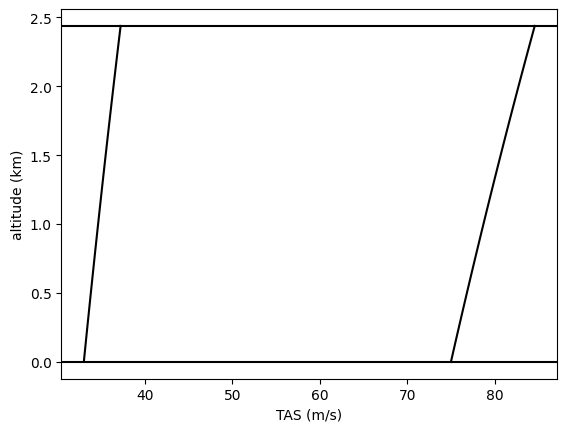

In [10]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

mass = 1500
CLmax = 1.1
Sref = 20
max_EAS = 75
ceiling = 2438 #meters
temperature_sealevel = 288.15 #kelvin
pressure_sealevel = 1.01325E5 #Pa
g_sealevel = 9.80665 #m/s^2
R = 287.053
radius_earth = 6378 #km

altitude = np.linspace(0,ceiling/1e3,100)
temperature = temperature_sealevel - 71.5 + 2 * np.log(1 + np.exp(35.75 - 3.25 * altitude) + np.exp(-3 + 0.0003 * altitude**3))
pressure = pressure_sealevel * np.exp(-0.118 * altitude - (0.0015*altitude**2 / (1 - 0.018 * altitude + 0.0011 * altitude**2)))
density_sealevel = pressure_sealevel / (R * temperature_sealevel)
density = pressure / (R * temperature)
TAS = max_EAS * np.sqrt(density_sealevel/density)
g = g_sealevel * (radius_earth / (radius_earth + altitude))**2
velocity_stall = np.sqrt(2 * mass * g / (density * Sref * CLmax))

plt.plot(TAS,altitude,c='black')
plt.axhline(ceiling/1e3,c='black')
plt.plot(velocity_stall,altitude,c='black')
plt.axhline(0,c='black')
plt.xlabel('TAS (m/s)')
plt.ylabel('altitude (km)')
plt.show()




